Need help on cells 7 (cloud cover) and 9

In [ ]:
#Cell 1
!pip install fiona
!pip install geopandas
!pip install rasterio
!pip install sentinelsat

In [ ]:
#Cell 2: import some libraries

#Libraries used:
#MatplotLib: 
# python -m pip install -U matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#makes the images display inside this notebook:
%matplotlib inline 
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import matplotlib.collections as collections
import matplotlib.patches as patches
from PIL import Image
import mpl_toolkits.axes_grid1 as axes_grid1

#tkinter to support gui dialogue boxes, etc
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter.simpledialog import askinteger

#Numpy
import numpy as np


#shapely (interface to GEOS) "pip install shapely"
from shapely.geometry import Point
from shapely import geometry
from shapely.geometry import Polygon

#Fiona
import fiona

#GeoPandas
import geopandas as gpd
# pip install geopandas

#Folium
import folium 
# pip install folium

#rasterio
import rasterio as rio
from rasterio.mask import mask

#pyplot
import matplotlib.pyplot as plt

#
from sentinelsat import SentinelAPI
#from sentinelsat.sentinel import get_coordinates
import datetime
from datetime import date


import zipfile
import glob
import os

In [ ]:
#Cell 3 : Study area
#case study
#**Name:** 			        Ackerpulco
#**Link:**			        http://ackerpulco-farm.de/
#**Location:**			    Schlossstraße 5, 15518, Alt-Madlitz, Germany
#**Coordinates:**		    52.37962462071622, 14.280646369492525 --- 52°22'46.7"N 14°16'50.3"E

lat = 52.37962462071622
lon = 14.280646369492525

In [ ]:
#Cell 4 create a basic map of the area

tooltip = "Click me!"
m = folium.Map([lat, lon], zoom_start=16)
folium.Marker(
    [lat, lon], popup="<b>Ackerpulco</b>", tooltip=tooltip
).add_to(m)
m

In [ ]:
#Cell 5 : designate an area around our given coordinate point

m = folium.Map([lat, lon], zoom_start=16)
folium.Marker([lat, lon], popup="<b>Ackerpulco</b>", tooltip=tooltip).add_to(m)

##draw a rectangle centered around lat, lon 
##(the physical distance a degree of longitude is depends on the latitude, we can update this later)
degree=0.01
lat_point_list = [lat-(degree/2), lat+(degree/2), lat+(degree/2), lat-(degree/2)]
lon_point_list = [lon-(degree/2), lon-(degree/2), lon+(degree/2), lon+(degree/2)]
#these will become the corners of our shapefile. 

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
#crs = {'init': 'epsg:32721'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       

#polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
#polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

#m = folium.Map([lat, lon], zoom_start=16, tiles='cartodbpositron')
m = folium.Map([lat, lon], zoom_start=15)
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
# Cell 6: use the Sential API to find imagery featuring our shapefile from cell 5
#Work in Progress
# Documentation : https://sentinelsat.readthedocs.io/en/v0.8/api.html

user = 'clairemacd' 
password = 'cl!mateF4rmers' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

footprint = None
for i in polygon['geometry']:
    footprint = i

#Date format is YYYYMMDD, 
products = api.query(footprint,
                     date = ('20210321', '20210323'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A'
                    # cloudcoverpercentage = '[0 TO 100]'
                    )
print(len(products))


#sort by cloud coverage - NEEDS TO BE IMPLEMENTED
#products_gdf = api.to_geodataframe(products)
#products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
#products_gdf_sorted


filename=next(iter(products))
#download

api.download(filename)
#this goes into the colab files folder for now, over on the left

1


Downloading: 100%|██████████| 833M/833M [00:27<00:00, 30.5MB/s]
MD5 checksumming: 100%|██████████| 833M/833M [00:02<00:00, 402MB/s]


{'Creation Date': datetime.datetime(2021, 3, 22, 21, 3, 1, 118000),
 'Ingestion Date': datetime.datetime(2021, 3, 22, 21, 2, 9, 889000),
 'Online': True,
 'date': datetime.datetime(2021, 3, 22, 10, 16, 49, 24000),
 'downloaded_bytes': 832695448,
 'footprint': 'POLYGON((14.903451249022112 53.24815890064931,14.825442799537829 53.10777393175013,14.82082146146042 53.0994049389826,14.745515350688772 52.963296571199045,14.666594771475213 52.81978602945019,14.630286804231746 52.75328953250104,14.588482879062644 52.67707925997156,14.510310005501482 52.53335022869242,14.432479505731123 52.38960310212814,14.362028732207463 52.25808511238739,13.534433848467895 52.25344953517325,13.500940412097547 53.240200815060746,14.903451249022112 53.24815890064931))',
 'id': '7d6d4bf3-2ae0-4e72-af1a-4f8a288cb0e2',
 'md5': '38f448f01461ae91172c224efe07b942',
 'path': './S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.zip',
 'size': 832695448,
 'title': 'S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU

In [ ]:
#Cell 7: unzip file, delete images we don't need, move files


list_of_files = glob.glob('/content/*.zip') # * means all if need specific format then *.zip
latest_file = max(list_of_files, key=os.path.getctime)
print('unzipping '+latest_file)

#unzip:
with zipfile.ZipFile(latest_file, 'r') as zip_ref:
    zip_ref.extractall('/content/')

#Navigate to Images

list_of_files = glob.glob('/content/*') # * means all if need specific format then *.zip
new_folder = max(list_of_files, key=os.path.getctime)

nav1 = glob.glob(new_folder+'/GRANULE/') 
nav1str = ' '.join([str(elem) for elem in nav1]) #convert nav1 to a single string
print(nav1str)
nav2 = os.listdir(nav1str)
nav2str = ' '.join([str(elem) for elem in nav2])
nav3 = glob.glob(nav1str + nav2str) 
nav3str = ' '.join([str(elem) for elem in nav3])
list_of_images = glob.glob(nav3str + '/IMG_DATA/R10m/*') 
print("Available Images:")
print(*list_of_images, sep = "\n")




unzipping /content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.zip
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/
Available Images:
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_B02_10m.jp2
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_B03_10m.jp2
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_WVP_10m.jp2
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_AOT_10m.jp2
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_2021032

In [ ]:
#Delete all images besides 04 and 08 by index (NEED TO REDO ASAP)

#make a string of first/any file name
filename=(list_of_images[0])
filenameStr = ''.join([str(elem) for elem in filename])
#print(filenameStr)

#cut off the last 10 characters
new_str = filenameStr[:-11] 

#delete filenamestringB02_10m.jp2
os.remove(new_str+'B02_10m.jp2')
#delete filenamestringB03_10m.jp2
os.remove(new_str+'B03_10m.jp2')
#delete filenamestringTCI_10m.jp2
os.remove(new_str+'TCI_10m.jp2')
#delete filenamestringAOT_10m.jp2
os.remove(new_str+'AOT_10m.jp2')
#delete filenamestringWVP_10m.jp2
os.remove(new_str+'WVP_10m.jp2')

finalImages = glob.glob(nav3str + '/IMG_DATA/R10m/*') 
print("After deleting unneeded images:")
print(*finalImages, sep = "\n")

#move bands 4 and 8?


After deleting unneeded images:
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_B08_10m.jp2
/content/S2B_MSIL2A_20210322T101649_N0214_R065_T33UVU_20210322T131721.SAFE/GRANULE/L2A_T33UVU_A021112_20210322T101644/IMG_DATA/R10m/T33UVU_20210322T101649_B04_10m.jp2


In [ ]:
#Cell 8: #open satellite image and preview
#https://rasterio.readthedocs.io/en/latest/topics/reading.html
image = rio.open(new_str+'B04_10m.jp2')


image=image.squeeze()
fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

im0 = grid[0].imshow(image, cmap='pink', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)


AttributeError: ignored

In [ ]:
#Cell 9 : #Clip band 4 Image to shapefile

#from https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b (also in notion)
# the above link is available on notion as a pdf as well

areaOfInterest_proj = polygon.to_crs({'init': 'epsg:32633'})

with rio.open((new_str+'B04_10m.jp2')) as src:
    b4_out_image, out_transform = rio.mask.mask(src, areaOfInterest_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": b4_out_image.shape[1],
                 "width": b4_out_image.shape[2],
                 "transform": out_transform})
    
    print(np.shape(b4_out_image))

with rio.open("b4_cropped.tif", "w", **out_meta) as dest:
    dest.write(b4_out_image)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(1, 113, 71)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


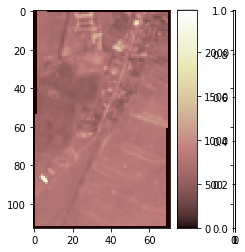

In [ ]:
#Cell 10

#display new, cropped image    
image = b4_out_image

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)
image = image.squeeze()
im0 = grid[0].imshow(image, cmap='pink', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)


In [ ]:
#Cell 10: Crop for Band 8 as well

with rio.open((new_str+'B08_10m.jp2')) as src:
    b8_out_image, out_transform = rio.mask.mask(src, areaOfInterest_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": b8_out_image.shape[1],
                 "width": b8_out_image.shape[2],
                 "transform": out_transform})
    
print(np.shape(b8_out_image))


with rio.open("b8_cropped.tif", "w", **out_meta) as dest:
    dest.write(b8_out_image)

(1, 113, 71)


(1, 113, 71)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


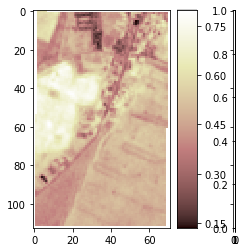

In [ ]:
#Cell 11 Apply NDVI to cropped images (HELP, b8 has different dimensions than b4)

b4 = rio.open('b4_cropped.tif')
b8 = rio.open('b8_cropped.tif')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()


# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)
#ndvi = ndvi.squeeze()
print(np.shape(ndvi))

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)
ndvi=ndvi.squeeze()
im0 = grid[0].imshow(ndvi, cmap='pink', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)


#print("Calculations of NDVI for a given pixel always result in a number that ranges from minus one (-1) to plus one (+1); however, no green leaves gives a value close to zero. A zero means no vegetation and close to +1 (0.8 - 0.9) indicates the highest possible density of green leaves.")

#print("from https://earthobservatory.nasa.gov/features/MeasuringVegetation/measuring_vegetation_2.php.")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. Landsat Surface Reflectance-derived SAVI is calculated as a ratio between the R and NIR values with a soil brightness correction factor (L) defined as 0.5 to accommodate most land cover types.
from https://www.usgs.gov/core-science-systems/nli/landsat/landsat-soil-adjusted-vegetation-index


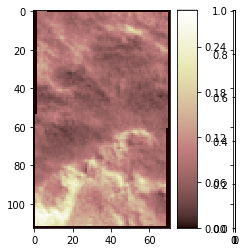

In [ ]:
# Calculate ndvi
#ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

#SAVI
L= 0.5
savi = ((nir.astype(float) - red.astype(float))*(1+L))/(nir + red + L)


# Write the SAVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)

with rio.open('SAVI.tif', 'w', **meta) as dst:
    dst.write(savi.astype(rio.float32))

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 2), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)
savi = savi.squeeze()
im0 = grid[0].imshow(savi, cmap='pink', interpolation='nearest')
grid.cbar_axes[0].colorbar(im0)


print("SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. Landsat Surface Reflectance-derived SAVI is calculated as a ratio between the R and NIR values with a soil brightness correction factor (L) defined as 0.5 to accommodate most land cover types.")

print("from https://www.usgs.gov/core-science-systems/nli/landsat/landsat-soil-adjusted-vegetation-index")

In [ ]:
#Cell 13: add satellite image to map
img = folium.raster_layers.ImageOverlay(
        name="Sentinel Data",
        image=src,
        #bounds=[[-56.09588341, -6.3317122], [-55.65438201, -7.32325225]], #needs to be updated for current region
        bounds = polygon,
        opacity=0.6,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

img.add_to(m)
folium.LayerControl().add_to(m)
m

TypeError: ignored